### Decison Tree - Heart Disease Problem

In [1]:
### Importing Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("heart_v2.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
## Create X & y


X = df.drop("heart disease", axis=1)
y = df["heart disease"]

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, random_state = 42)

X_train.shape, X_test.shape

((189, 4), (81, 4))

In [8]:
## Import more Libraries

from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

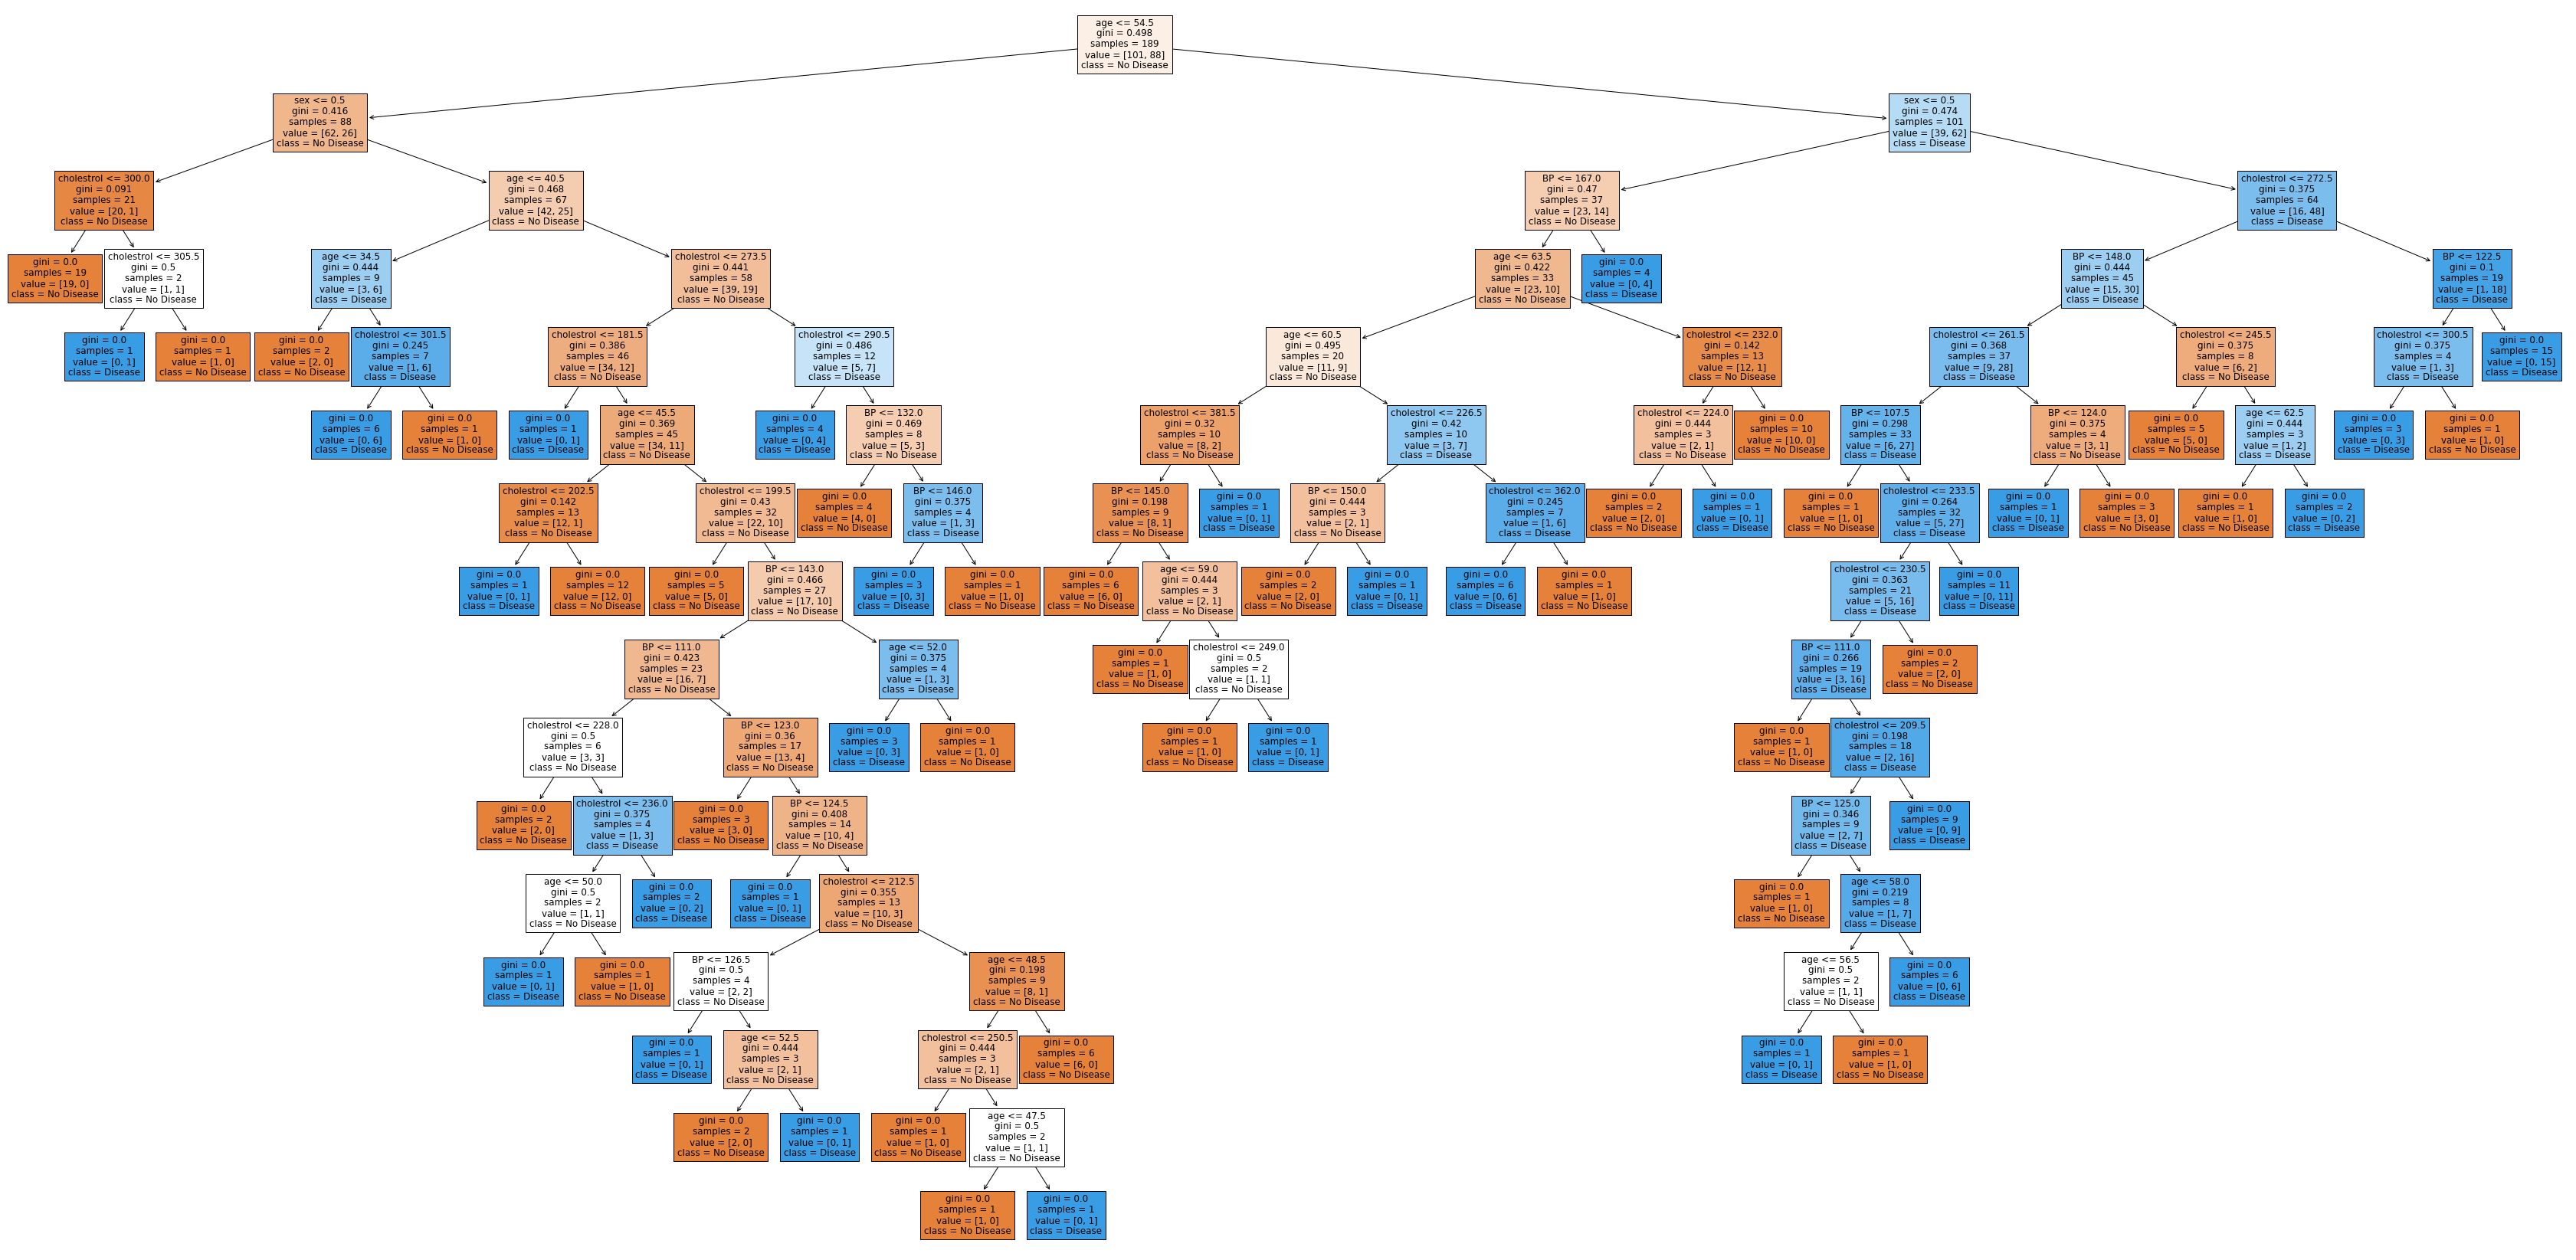

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

### Evaluating Model Perfromance

In [19]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
print(accuracy_score(y_train,y_train_pred))

confusion_matrix(y_train, y_train_pred)

1.0


array([[101,   0],
       [  0,  88]], dtype=int64)

In [22]:
print(accuracy_score(y_test,y_test_pred))

confusion_matrix(y_test, y_test_pred)

0.6666666666666666


array([[34, 15],
       [12, 20]], dtype=int64)

### Specifying minimum samples before split

In [23]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20)

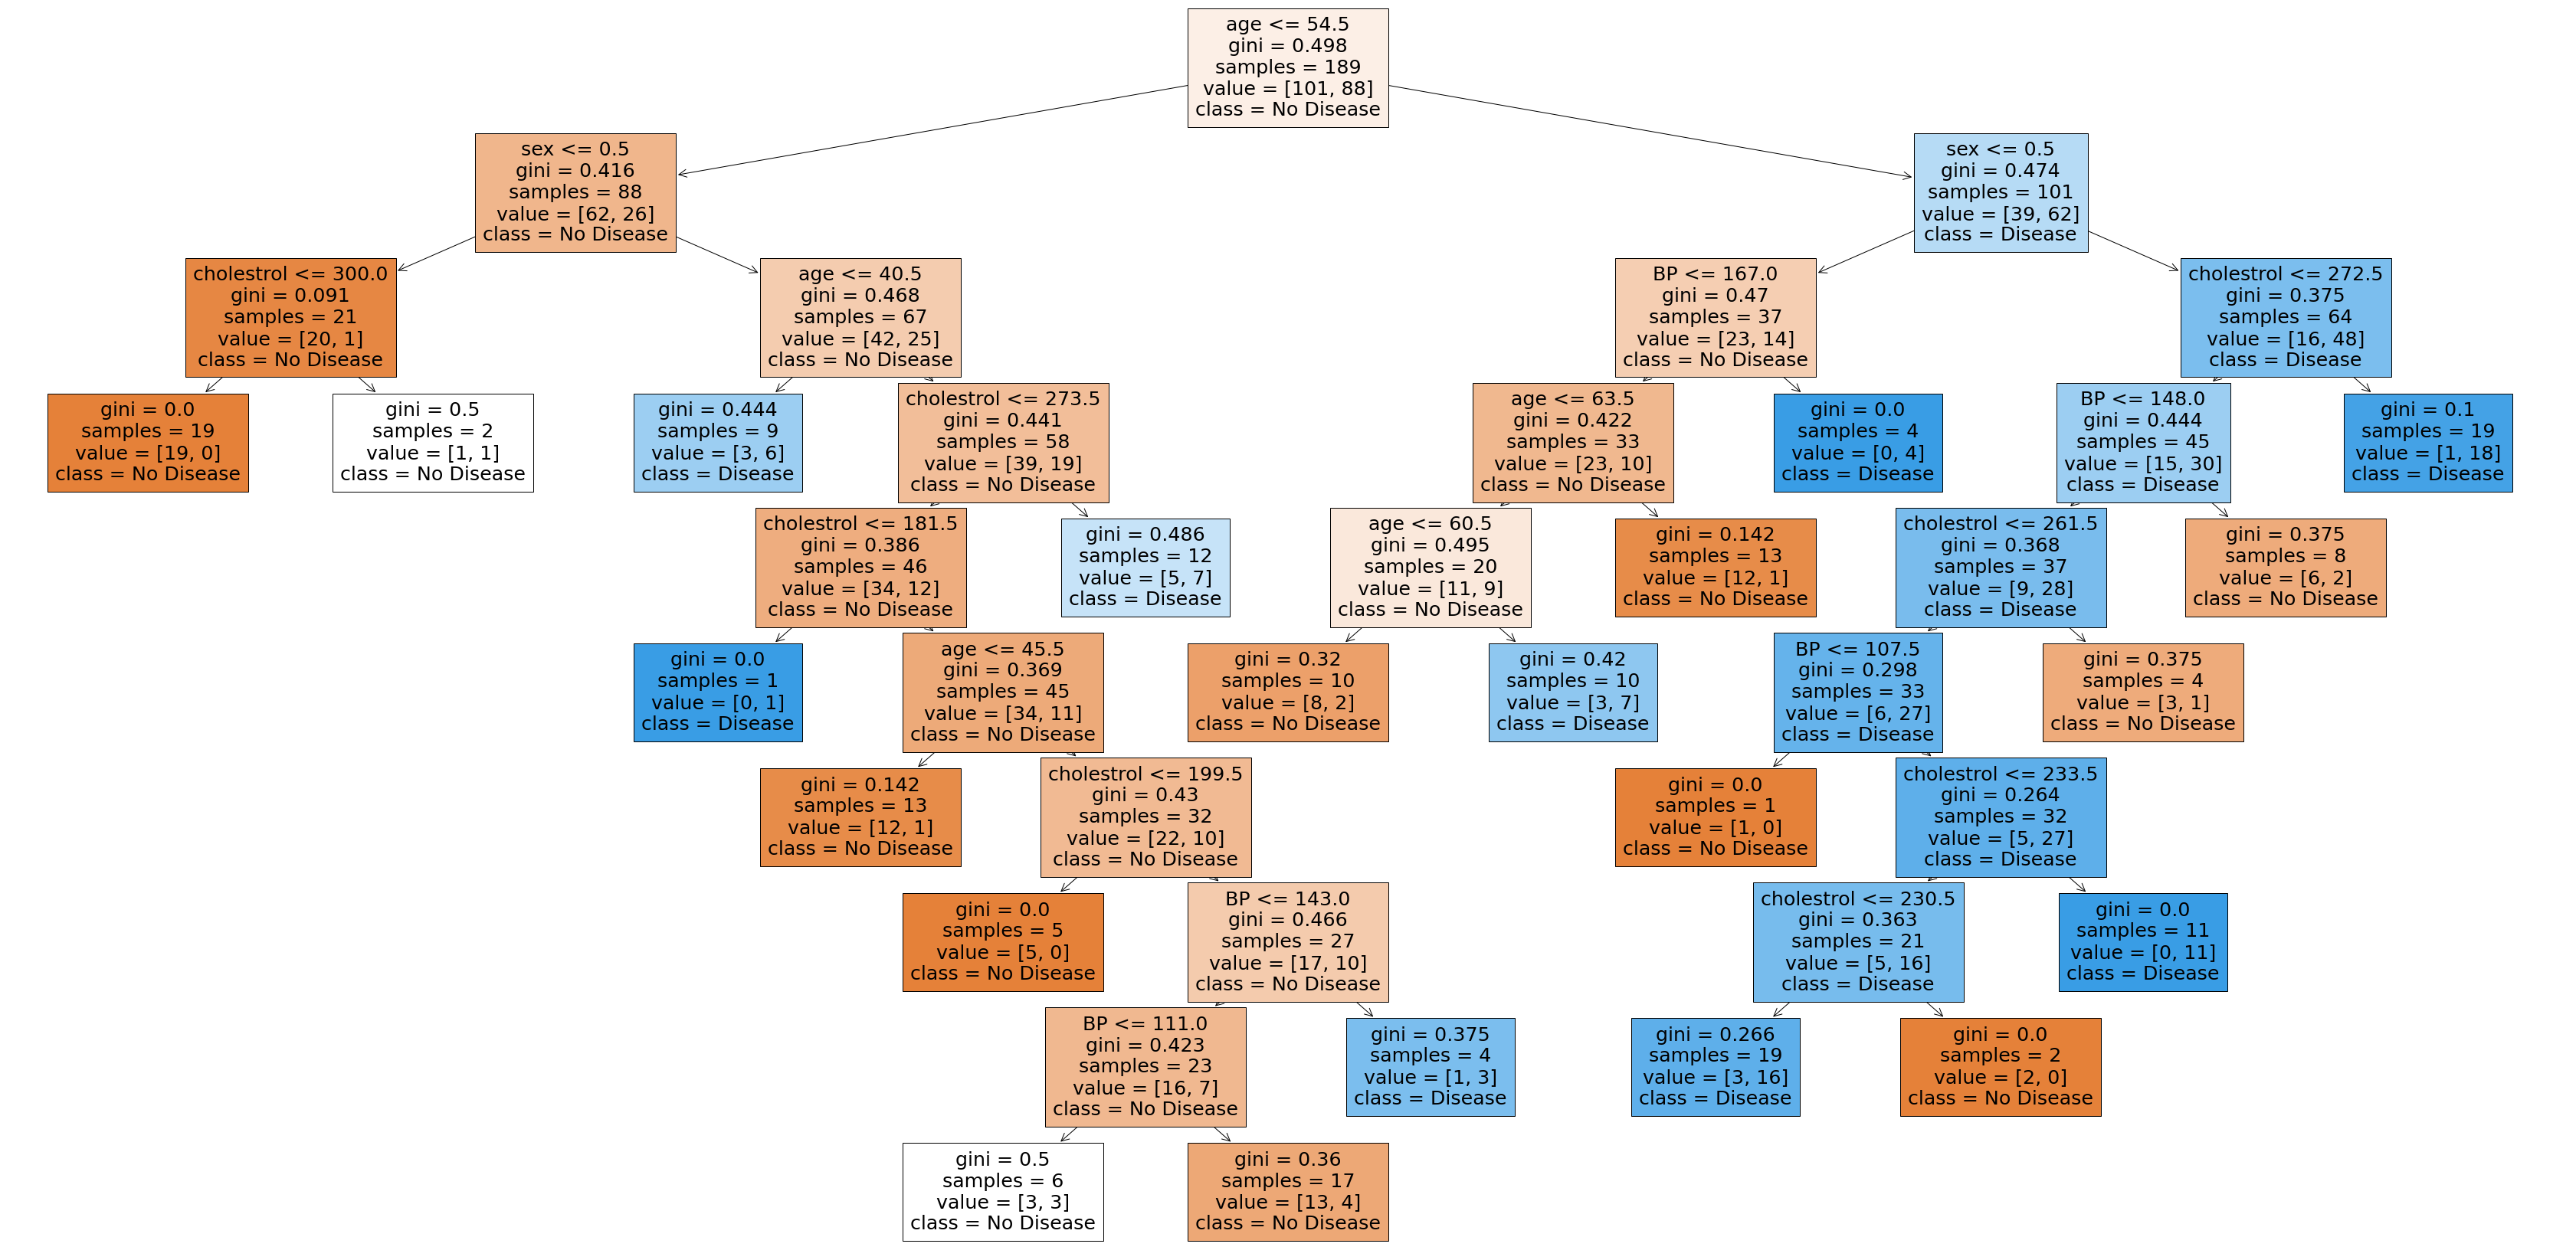

In [24]:
plt.figure(figsize=(60,30))
plot_tree(dt_min_split, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

In [32]:
y_train_pred = dt_min_split.predict(X_train)
y_test_pred = dt_min_split.predict(X_test)

In [33]:
    print(accuracy_score(y_train,y_train_pred))
    confusion_matrix(y_train, y_train_pred)

0.8359788359788359


array([[85, 16],
       [15, 73]], dtype=int64)

In [34]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6419753086419753


array([[32, 17],
       [12, 20]], dtype=int64)

### Specifying Minimum samples in Leaf Node

In [28]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

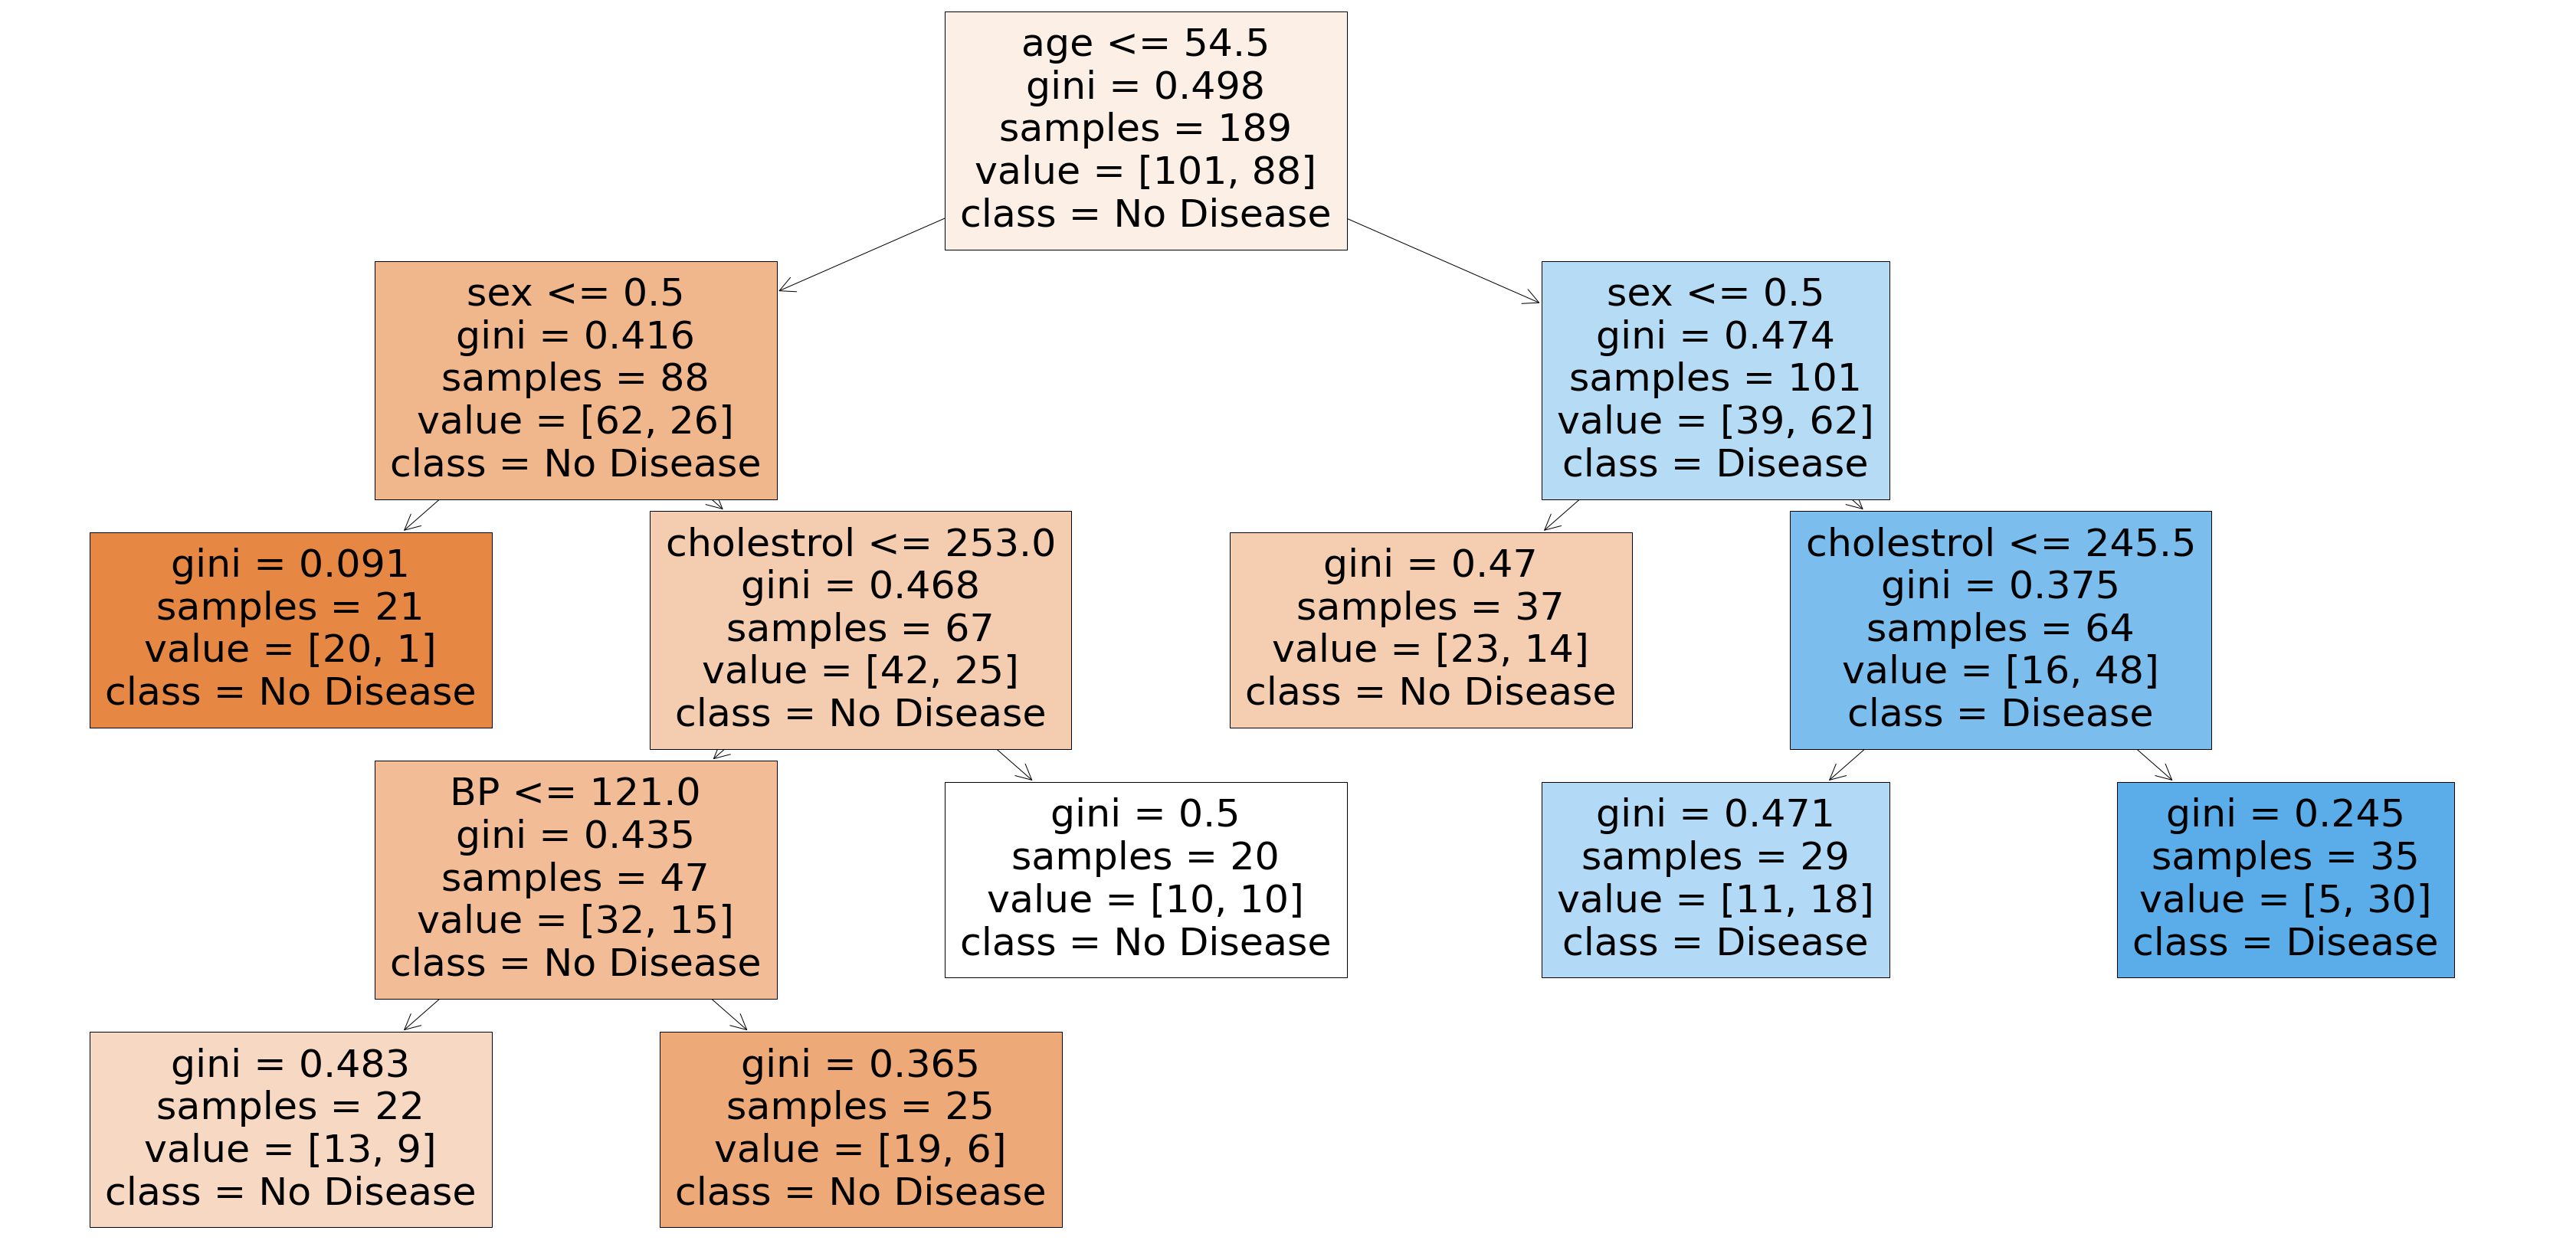

In [29]:
plt.figure(figsize=(60,30))
plot_tree(dt_min_leaf, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

In [35]:
y_train_pred = dt_min_leaf.predict(X_train)
y_test_pred = dt_min_leaf.predict(X_test)

In [36]:
    print(accuracy_score(y_train,y_train_pred))
    confusion_matrix(y_train, y_train_pred)

0.7037037037037037


array([[85, 16],
       [40, 48]], dtype=int64)

In [37]:
    print(accuracy_score(y_test,y_test_pred))
    confusion_matrix(y_test, y_test_pred)

0.6419753086419753


array([[38, 11],
       [18, 14]], dtype=int64)